In [36]:
import sys
print("Python Version:", sys.version)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
pd.set_option('display.max_rows', 500)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Python Version: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [4]:
# Import cleaned dataframe containing MTA Turnstile Data.
df_turns_no_outlier = pd.read_pickle('Cleaned_Working_Dataframe.pkl')

# Bringing in Census Data and Various Chart Work

### Median Traffic per stations for each day.

Text(0, 0.5, 'Weekday')

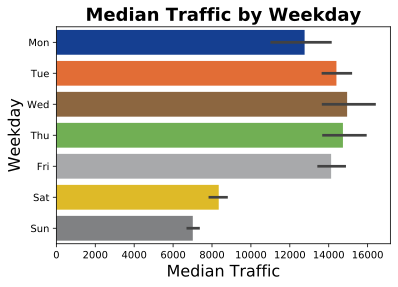

In [83]:

#Create a color palet to match NYC subway colors
clrs = ['#0039A6', '#FF6319', '#996633', '#6CBE45', '#A7A9AC', '#FCCC0A',
        '#808183', '#EE352E', '#00933C', '#B933AD']

# Set order for days of the week variable.
df_turns_no_outlier['Weekday'] = pd.Categorical(df_turns_no_outlier['Weekday'], categories=
    ['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'],
    ordered=True)

df_days = df_turns_no_outlier.groupby(['DATE','Weekday'],as_index=False).median()

sns.barplot(y ='Weekday',
            x='Total_Traffic_x',
            data=df_days, 
            orient='h', 
            palette=clrs)
plt.title('Median Traffic by Weekday', weight = 'bold', size=18)
plt.xlabel('Median Traffic',size=16)
plt.ylabel('Weekday',size=16)

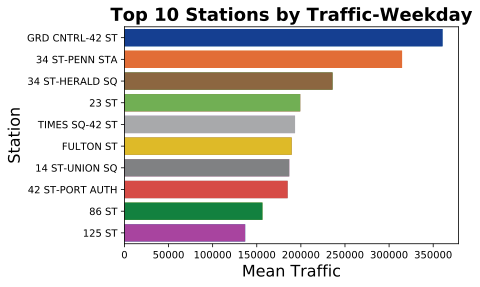

In [72]:
#Replace with other version?

# Create chart of stations with the highest average daily traffic on weekdays.
df_filt_weekdays = df_turns_no_outlier[df_turns_no_outlier.Weekday.isin(['Mon','Tue','Wed','Thu','Fri'])]
df_filt_weekdays = df_filt_weekdays.groupby(['STATION'], as_index=False).mean()
df_filt_weekdays = df_filt_weekdays.sort_values('Total_Traffic_x', ascending=False).head(10)
sns.barplot(x ='Total_Traffic_x',y='STATION',data=df_filt_weekdays, orient='h')



sns.barplot(x ='Total_Traffic_x',
            y='STATION',
            data=df_filt_weekdays,
            orient='h', 
            palette=clrs)
plt.title('Top 10 Stations by Traffic-Weekday', weight = 'bold', size=18)
plt.xlabel('Mean Traffic',size=16)
plt.ylabel('Station',size=16)
plt.savefig('Top 10.svg')

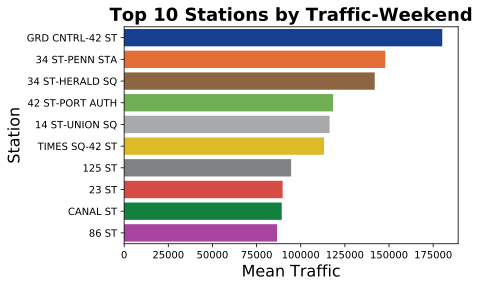

In [86]:
#Replace with other version?

# Create chart of stations with the highest average daily traffic on weekends.
df_filt_weekend = df_turns_no_outlier[df_turns_no_outlier.Weekday.isin(['Sat','Sun'])]
df_filt_weekend = df_filt_weekend.groupby(['STATION'], as_index=False).mean()
df_filt_weekend = df_filt_weekend.sort_values('Total_Traffic_x', ascending=False).head(10)

#Create plot
sns.barplot(x ='Total_Traffic_x',
            y='STATION',
            data=df_filt_weekend, 
            orient='h', 
            palette=clrs)
plt.title('Top 10 Stations by Traffic-Weekend', weight = 'bold', size=18)
plt.xlabel('Mean Traffic',size=16)
plt.ylabel('Station',size=16)
plt.savefig('Top 10.svg')

# Bring in Census Data and Develop a Scoring System

In this section we can import the census data we have collected and develop our scoring system for ranking charts and building our station map. Folium is a python package that allows us to use the Leaflet Javascript library.

In [8]:
import folium
from folium.plugins import MarkerCluster

## Adding Census Data to Average Daily Traffic per Station

In [68]:
#Make Map for Weekdays by filtering our weekday column and aggregating at the station level.
df_filt_weekdays = df_turns_no_outlier[df_turns_no_outlier.Weekday.isin(['Mon','Tue','Wed','Thu','Fri'])]
df_filt_weekdays = df_filt_weekdays.groupby(['STATION'], as_index=False).mean()


# bring in Census data that was created with a seperate R script.
cen_dat = pd.read_csv('geocoded_cen_dat.csv')

# Identify the columns from census data that we want to use in our new combined dataframe.
cen_vars=['STATION',
          'LAT',
          'LON',
          'p_f_pop',
          'p_emp_info',
          'p_emp_prof',
          'p_75_100k',
          'p_over_100k']

# Add census Data to Weekday Station Data with a left join on station
df_filt_weekdays_cen=pd.merge(df_filt_weekdays, 
                              cen_dat[cen_vars],  
                              how='left', 
                              left_on=['STATION'], 
                              right_on = ['STATION']
                             )

# Because census data includes the division column, stations become duplicated. We can just remove the duplicates.
df_filt_weekdays_cen =df_filt_weekdays_cen.drop_duplicates(['STATION'])

,STATION,Entry_Diff,Exit_Diff,Total_Traffic_x,level_1,Total_Traffic_y,Diff,LAT,LON,p_f_pop,p_emp_info,p_emp_prof,p_75_100k,p_over_100k
290,GRD CNTRL-42 ST,182708.634146,177870.707317,360579.341463,0.95,2310450.70,1.949871e+06,40.755861,-73.987061,0.245455,0.092105,0.355263,0.453,0.297
81,34 ST-PENN STA,163151.048780,151562.926829,314713.975610,0.95,338810.80,2.409682e+04,40.751056,-73.990310,0.379121,0.235714,0.228571,0.128,0.684
78,34 ST-HERALD SQ,120427.804878,115497.463415,235925.268293,0.95,252136.40,1.621113e+04,40.750087,-73.988127,0.379121,0.235714,0.228571,0.128,0.684
62,23 ST,114133.365854,85164.170732,199297.536585,0.95,234861.20,3.556366e+04,40.741201,-73.989034,0.525245,0.092991,0.238662,0.130,0.720
420,TIMES SQ-42 ST,99392.731707,93998.560976,193391.292683,0.95,209555.50,1.616421e+04,40.755861,-73.987061,0.245455,0.092105,0.355263,0.453,0.297
280,FULTON ST,99753.860465,89837.837209,189591.697674,0.95,507437.00,3.178453e+05,40.710648,-74.009296,0.560466,0.042380,0.311535,0.160,0.592
22,14 ST-UNION SQ,95747.682927,91118.780488,186866.463415,0.95,211816.60,2.495014e+04,40.734537,-73.990324,0.512696,0.095516,0.175355,0.083,0.684
90,42 ST-PORT AUTH,101386.146341,83604.463415,184990.609756,0.95,198791.90,1.380129e+04,40.757835,-73.991463,0.403017,0.052671,0.151951,0.140,0.485
140,86 ST,80370.500000,76106.404762,156476.904762,0.95,182628.40,2.615150e+04,40.777741,-73.951567,0.486410,0.060634,0.172976,0.146,0.520
14,125 ST,75244.804878,61660.048780,136904.853659,0.95,155104.80,1.819995e+04,40.804386,-73.937429,0.462644,0.068702,0.074046,0.058,0.072


### Creating a Scoring System

When looking at our census data, it can be difficult to make any judgments without the broader context of other locations. As an example, is 40% female population a high amount, or a low amount? In order to make things more interpretable we can convert the data into a percentile ranking. We can also do this for traffic volumes so all our data can be easily added to a final score.



In [ ]:
# Convert Census and Traffic Data to a percentile ranking and multiply by 100. Stations with the highest values 
# for each Variable with have a score of 100 and the lowest will recieve a 0.

df_filt_weekdays_cen['Traffic_Rank'] = df_filt_weekdays_cen['Total_Traffic_x'].rank(ascending=True,pct=True)*100
df_filt_weekdays_cen['p_f_pop_Rank'] = df_filt_weekdays_cen['p_f_pop'].rank(ascending=True,pct=True)*100
df_filt_weekdays_cen['p_emp_info_Rank'] = df_filt_weekdays_cen['p_emp_info'].rank(ascending=True,pct=True)*100
df_filt_weekdays_cen['p_emp_prof_Rank'] = df_filt_weekdays_cen['p_emp_prof'].rank(ascending=True,pct=True)*100
df_filt_weekdays_cen['p_75_100k_Rank'] = df_filt_weekdays_cen['p_75_100k'].rank(ascending=True,pct=True)*100
df_filt_weekdays_cen['p_over_100k_Rank'] = df_filt_weekdays_cen['p_over_100k'].rank(ascending=True,pct=True)*100

# Calculate a Recommendation Score using custom weights. To give certain variables more influence on the score, increase their
# weight. Weights should sum to 1.
df_filt_weekdays_cen['Recommending_Score'] = (df_filt_weekdays_cen['Traffic_Rank'] * .50) +\
                                       (df_filt_weekdays_cen['p_f_pop_Rank'] * .2)+ \
                                       (df_filt_weekdays_cen['p_emp_info_Rank'] * .1)+ \
                                       (df_filt_weekdays_cen['p_emp_prof_Rank'] * .1)+ \
                                       (df_filt_weekdays_cen['p_75_100k_Rank'] * .05)+ \
                                       (df_filt_weekdays_cen['p_over_100k_Rank'] * .05)

# Create a dataframe that is sorted on traffic and keeps the top 100 stations.
df_filt_weekdays_cen_traf = df_filt_weekdays_cen.sort_values('Total_Traffic_x', ascending=False).head(100).reset_index(drop=True)

# Create a dataframe that is sorted on our custom recommendation score.
df_filt_weekdays_cen_score =df_filt_weekdays_cen.sort_values('Recommending_Score', ascending=False).head(10).reset_index(drop=True)



### Making the Map

We can now build a map that will highlight the top 10 stations by traffic, the top 10 stations by our scoring system, and the top 100 stations by traffic. The size of the circles on the map will represent their average daily traffic, divided by 300 in order to scale them down so they will fit on the map better.

In [ ]:
# Create a list of station coordinates to be passed to the map.
stations = df_filt_weekdays_cen_traf[['LAT','LON']]
stations_list=stations.values.tolist()

#Define coordinates of map center
nyc_coords = [40.7528, -73.9560]

#Create the map object
my_map = folium.Map(location = nyc_coords, zoom_start = 12)

# Iterate through our ranked stations, showing the top 10 as larger green circles and the other stations as 
# smaller yellow circles. The radius of the circles will be determined by their total traffic numbers 300
for point in range(0, len(stations_list)):
    if point <=10:
         folium.Circle(stations_list[point], 
                       popup=df_filt_weekdays_cen_traf.STATION[point],
                       fill=True,
                       radius=df_filt_weekdays_cen_traf.Total_Traffic_x[point]/300,
                       color='#00933C').add_to(my_map)
    else:
        folium.Circle(stations_list[point], 
                      popup=df_filt_weekdays_cen_traf.STATION[point],
                      fill=True,
                      radius=df_filt_weekdays_cen_traf.Total_Traffic_x[point]/300,
                      color='#FF6319').add_to(my_map)

# Dark map tiles
folium.TileLayer('cartodbdark_matter').add_to(my_map)

# light map tiles
folium.TileLayer('cartodbpositron').add_to(my_map)

my_map

In [63]:
# Add top 10 stations by score in orange circles using same method as above.
stations_score = df_filt_weekdays_cen_score[['LAT','LON']]
stations_list_score=stations_score.values.tolist()

for point in range(0,10):
    folium.Circle(stations_list_score[point], 
                  popup=df_filt_weekdays_cen_score.STATION[point],
                  fill=True,
                  radius=df_filt_weekdays_cen_score.Total_Traffic_x[point]/300,
                  color='#FCCC0A').add_to(my_map)

# add layer control for easier swapping light and dark, not sure which we will use.
folium.LayerControl().add_to(my_map)       
my_map        

# Weekend Map

Going through the same process but filtering to our weekend set.

In [60]:
#Make Map for Weekends using process above.
df_filt_weekends = df_turns_no_outlier[df_turns_no_outlier.Weekday.isin(['Sat','Sun'])]
df_filt_weekends = df_filt_weekends.groupby(['STATION'], as_index=False).mean()

# Add census Data to Weekend Station Data with a left join on station
df_filt_weekends_cen=pd.merge(df_filt_weekends, 
                              cen_dat[cen_vars],  
                              how='left', 
                              left_on=['STATION'], 
                              right_on = ['STATION']
                             )

# Because census data includes division stations become duplicated. We can just remove the duplicates.
df_filt_weekends_cen =df_filt_weekends_cen.drop_duplicates(['STATION'])
df_filt_weekends_cen.sort_values('Total_Traffic_x', ascending=False).head(100)

# Convert Census and Traffic Data to a percentile ranking and multiply by 100. Stations with the highest values for each
# Variable with have a score of 100 and the lowest will recieve a 0. This will help make the variables easier to combine
# into a score in the future.
df_filt_weekends_cen['Traffic_Rank'] = df_filt_weekends_cen['Total_Traffic_x'].rank(ascending=True,pct=True)*100
df_filt_weekends_cen['p_f_pop_Rank'] = df_filt_weekends_cen['p_f_pop'].rank(ascending=True,pct=True)*100
df_filt_weekends_cen['p_emp_info_Rank'] = df_filt_weekends_cen['p_emp_info'].rank(ascending=True,pct=True)*100
df_filt_weekends_cen['p_emp_prof_Rank'] = df_filt_weekends_cen['p_emp_prof'].rank(ascending=True,pct=True)*100
df_filt_weekends_cen['p_75_100k_Rank'] = df_filt_weekends_cen['p_75_100k'].rank(ascending=True,pct=True)*100
df_filt_weekends_cen['p_over_100k_Rank'] = df_filt_weekends_cen['p_over_100k'].rank(ascending=True,pct=True)*100

# Calculate a Recommendation Score
df_filt_weekends_cen['Recommending_Score'] = (df_filt_weekends_cen['Traffic_Rank'] * .50) +\
                                       (df_filt_weekends_cen['p_f_pop_Rank'] * .2)+ \
                                       (df_filt_weekends_cen['p_emp_info_Rank'] * .1)+ \
                                       (df_filt_weekends_cen['p_emp_prof_Rank'] * .1)+ \
                                       (df_filt_weekends_cen['p_75_100k_Rank'] * .05)+ \
                                       (df_filt_weekends_cen['p_over_100k_Rank'] * .05)

df_filt_weekends_cen_traf = df_filt_weekends_cen.sort_values('Total_Traffic_x', ascending=False).head(100).reset_index(drop=True)
df_filt_weekends_cen_score =df_filt_weekends_cen.sort_values('Recommending_Score', ascending=False).head(10).reset_index(drop=True)



# Create a list of station coordinates to be passed to the map.
stations = df_filt_weekends_cen_traf[['LAT','LON']]
stations_list=stations.values.tolist()
#Define coordinates of map center
nyc_coords = [40.7528, -73.9560]

#Create the map
my_map = folium.Map(location = nyc_coords, zoom_start = 12)

for point in range(0, len(stations_list)):
    if point <=10:
         folium.Circle(stations_list[point], popup=df_filt_weekends_cen_traf.STATION[point],fill=True,radius=df_filt_weekends_cen_traf.Total_Traffic_x[point]/200,color='#00933C').add_to(my_map)
    else:
        folium.Circle(stations_list[point], popup=df_filt_weekends_cen_traf.STATION[point],fill=True,radius=df_filt_weekends_cen_traf.Total_Traffic_x[point]/200,color='#FF6319').add_to(my_map)

# Dark map tiles
folium.TileLayer('cartodbdark_matter').add_to(my_map)

# light map tiles
folium.TileLayer('cartodbpositron').add_to(my_map)

my_map

In [61]:
# Add top 10 stations by score in orange circles
stations_score = df_filt_weekends_cen_score[['LAT','LON']]
stations_list_score=stations_score.values.tolist()


for point in range(0,10):
    folium.Circle(stations_list_score[point], popup=df_filt_weekends_cen_score.STATION[point],fill=True,radius=df_filt_weekends_cen_score.Total_Traffic_x[point]/200,color='#FCCC0A').add_to(my_map)

# add layer control for easier swapping light and dark, not sure which we will use.
folium.LayerControl().add_to(my_map)
my_map   

# Top 10 stations Weekday

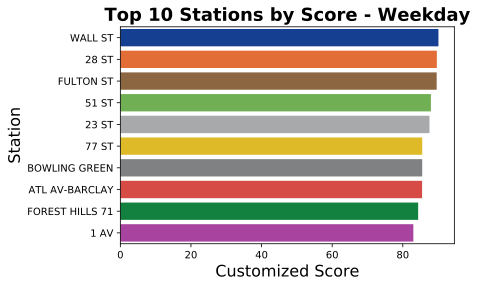

In [64]:
#Create a top 10 plot of stations based on our scoring system.

sns.barplot(x ='Recommending_Score',y='STATION',data=df_filt_weekdays_cen_score, orient='h', palette=clrs)
plt.title('Top 10 Stations by Score - Weekday', weight = 'bold', size=18)
plt.xlabel('Customized Score',size=16)
plt.ylabel('Station',size=16)
plt.savefig('Top 10.svg')

# Top 10 stations Weekends

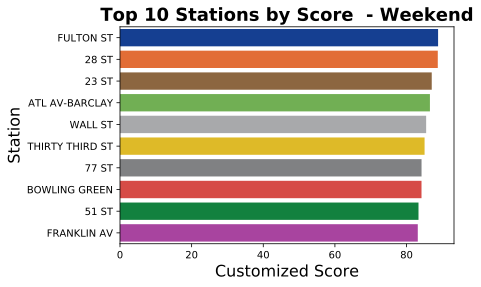

In [67]:
#Create a top 10 plot of stations based on our scoring system.

sns.barplot(x ='Recommending_Score',y='STATION',data=df_filt_weekends_cen_score, orient='h', palette=clrs)
plt.title('Top 10 Stations by Score  - Weekend', weight = 'bold', size=18)
plt.xlabel('Customized Score',size=16)
plt.ylabel('Station',size=16)
plt.savefig('Top 10.svg')